# Proyek Akhir Membangun Sistem Machine Learning: Loan Approval Dataset


*   Nama: Anindya Aryoko
*   Email: anindyaaryoko24@gmail.com
*   ID Dicoding: anindya_aryoko_xZPq

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [6]:
!kaggle datasets download -d anishdevedward/loan-approval-dataset
!unzip loan-approval-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/anishdevedward/loan-approval-dataset
License(s): MIT
  0% 0.00/44.9k [00:00<?, ?B/s]
100% 44.9k/44.9k [00:00<00:00, 206MB/s]
Archive:  loan-approval-dataset.zip
  inflating: loan_approval.csv       


In [10]:
df = pd.read_csv("loan_approval.csv")
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [12]:
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB
None

Statistik Deskriptif:
              income  credit_score   loan_amount  years_employed       points
count    2000.000000   2000.000000   2000.000000     2000.000000  2000.000000
mean    90585.977000    573.946000  25308.503000       20.441000    56.680000
std     34487.874907    160.564945  14207.320147       11.777813    18.638033
min     3005

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

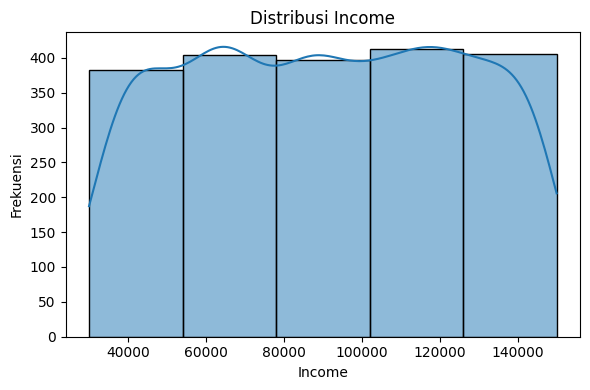

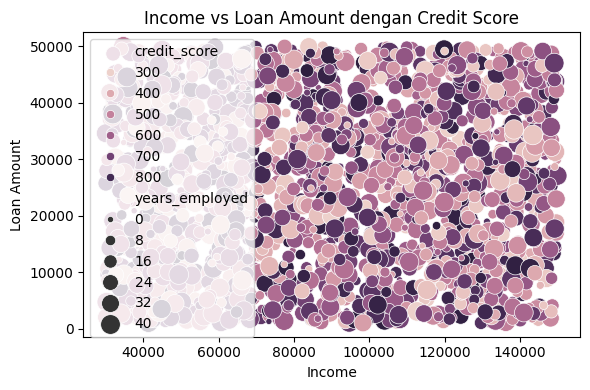

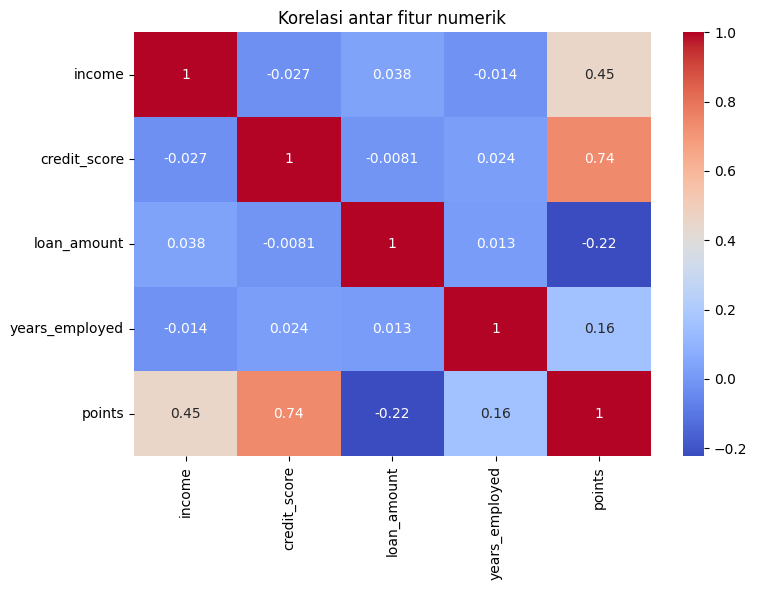

Membuat visualisasi: distribusi income, scatterplot income vs loan amount, dan heatmap korelasi.


In [15]:
# Visualisasi distribusi income
plt.figure(figsize=(6,4))
sns.histplot(df['income'], bins=5, kde=True)
plt.title('Distribusi Income')
plt.xlabel('Income')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.savefig("distribusi_income.png")
plt.show()
plt.close()

# Visualisasi hubungan income vs loan_amount
plt.figure(figsize=(6,4))
sns.scatterplot(x='income', y='loan_amount', data=df, hue='credit_score', size='years_employed', sizes=(20,200))
plt.title('Income vs Loan Amount dengan Credit Score')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.tight_layout()
plt.savefig("income_vs_loan_amount.png")
plt.show()
plt.close()

# Heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df[['income','credit_score','loan_amount','years_employed','points']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur numerik')
plt.tight_layout()
plt.savefig("heatmap_korelasi.png")
plt.show()
plt.close()

print("Membuat visualisasi: distribusi income, scatterplot income vs loan amount, dan heatmap korelasi.")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
# Mengecek nilai kosong pada dataset
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


In [17]:
# Mengecek duplikasi pada dataset
duplicates = df.duplicated().sum()

print(f"Jumlah baris duplikat: {duplicates}")

Jumlah baris duplikat: 0


In [20]:
# Fitur numerik yang akan distandarisasi
numeric_features = df.select_dtypes(include=['number']).columns

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print(df.head())

              name              city    income  credit_score  loan_amount  \
0     Allison Hill         East Jill  0.673565     -1.152134     1.013076   
1     Brandon Hall     New Jamesside -1.333961      0.965919    -0.694358   
2     Rhonda Smith      Lake Roberto -1.662100      0.062632    -0.994067   
3  Gabrielle Davis  West Melanieview  1.061799     -1.432464     1.655511   
4     Valerie Gray         Mariastad -0.711674     -0.485570     1.539415   

   years_employed    points  loan_approved  
0        0.557034 -0.358497          False  
1        0.641960 -0.090161          False  
2       -0.631939 -0.626832          False  
3        0.726887 -0.358497          False  
4       -1.396279 -1.700175          False  


In [28]:
# Melakukan deteksi outlier
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

for col in numeric_features:
    outliers = detect_outliers(df, col)
    print(f"\n=== Outlier pada kolom: {col} ===")
    print(f"Jumlah outlier: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[[col]])
    else:
        print("Tidak ada outlier ditemukan.")


=== Outlier pada kolom: income ===
Jumlah outlier: 0
Tidak ada outlier ditemukan.

=== Outlier pada kolom: credit_score ===
Jumlah outlier: 0
Tidak ada outlier ditemukan.

=== Outlier pada kolom: loan_amount ===
Jumlah outlier: 0
Tidak ada outlier ditemukan.

=== Outlier pada kolom: years_employed ===
Jumlah outlier: 0
Tidak ada outlier ditemukan.

=== Outlier pada kolom: points ===
Jumlah outlier: 0
Tidak ada outlier ditemukan.


In [29]:
# Melakukan drop pada kolom nama dan kota
df = df.drop(columns=['name', 'city'])
df.head()

,income,credit_score,loan_amount,years_employed,points,loan_approved
0,0.673565,-1.152134,1.013076,0.557034,-0.358497,False
1,-1.333961,0.965919,-0.694358,0.641960,-0.090161,False
2,-1.662100,0.062632,-0.994067,-0.631939,-0.626832,False
3,1.061799,-1.432464,1.655511,0.726887,-0.358497,False
4,-0.711674,-0.485570,1.539415,-1.396279,-1.700175,False


In [33]:
# Encoding pada data kategorikal
df['loan_approved'] = df['loan_approved'].astype(int)

df.head()

,income,credit_score,loan_amount,years_employed,points,loan_approved
0,0.673565,-1.152134,1.013076,0.557034,-0.358497,0
1,-1.333961,0.965919,-0.694358,0.641960,-0.090161,0
2,-1.662100,0.062632,-0.994067,-0.631939,-0.626832,0
3,1.061799,-1.432464,1.655511,0.726887,-0.358497,0
4,-0.711674,-0.485570,1.539415,-1.396279,-1.700175,0


# Mengeksport Data

In [34]:
df.to_csv("loan_approval_dataset_preprocessing.csv", index=False)